In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

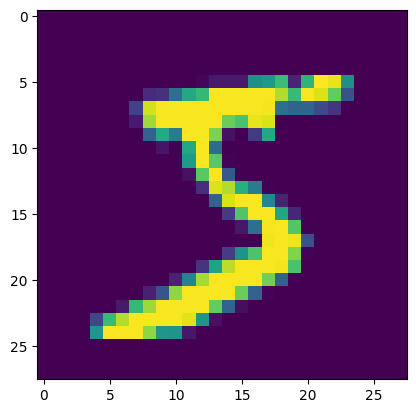

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
plt.imshow(x_train[0])
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1,28*28)

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [3]:
x_train.shape

(60000, 784)

In [4]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
class SimpleNet(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = tf.keras.layers.Dense(128, activation='relu')

        self.d2 = tf.keras.layers.Dense(10,activation='softmax')
        
    def call(self, x):
        x = self.d1(x)
        return self.d2(x)

In [6]:
model = SimpleNet()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn,
              optimizer= optimizer,
              metrics=['accuracy']
              )


In [7]:
epochs=3
batch_size= 32
num_batches = len(x_train)//batch_size

print(f"Number of batches: ",{num_batches})

Number of batches:  {1875}


In [8]:
model.trainable_variables

[]

In [10]:
history = model.fit(
    x=x_train,
    y =y_train,
    validation_data =(x_test,y_test),
    batch_size=16,
    epochs=10,
    verbose=1
)

Epoch 1/10
3750/3750 [==============================] - 6s 1ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 2/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0769 - val_accuracy: 0.9772
Epoch 3/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 4/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0897 - val_accuracy: 0.9761
Epoch 5/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0893 - val_accuracy: 0.9752
Epoch 6/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0830 - val_accuracy: 0.9787
Epoch 7/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.1087 - val_accuracy:

In [11]:
model.trainable_variables

[<tf.Variable 'simple_net/dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.03728472, -0.0589629 ,  0.02766305, ..., -0.05305646,
         -0.05021644, -0.03284643],
        [-0.00606037, -0.01080129,  0.00252075, ..., -0.05744233,
         -0.02497311, -0.06439161],
        [ 0.04628057,  0.07859526, -0.0087366 , ...,  0.06145602,
         -0.02099637,  0.04161795],
        ...,
        [ 0.07280856,  0.00471833,  0.06993388, ...,  0.07000952,
          0.04938518, -0.07819042],
        [ 0.00238161,  0.06835055, -0.07158491, ...,  0.03958157,
         -0.06148945, -0.06136915],
        [-0.04631355, -0.07385614,  0.01471099, ...,  0.07657538,
          0.0272906 , -0.01200446]], dtype=float32)>,
 <tf.Variable 'simple_net/dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 8.5551046e-02, -9.0370990e-02, -1.1866282e-01,  3.3326367e-01,
         3.4819573e-02, -7.7606231e-02,  6.9446139e-02, -8.7820664e-02,
         1.8224461e-01,  9.9748887e-02, -1.5234049e-01, -

In [12]:
model.summary()

Model: "simple_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  100480    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
for epoch in range(epochs):
    for batch in range(num_batches):
        start = batch* batch_size
        end = start + batch_size
        x_batch = x_train[start:end]
        y_batch = y_train[start:end]
        
        with tf.GradientTape() as tape:
            predictions = model(x_batch, training=True)
            loss = loss_fn(y_batch, predictions)
        gradients= tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        if batch%200 ==0:
            print(f"Batch {batch}/{num_batches}, Loss: {loss:.4f}")


Batch 0/1875, Loss: 0.0003
Batch 200/1875, Loss: 0.0002
Batch 400/1875, Loss: 0.0005
Batch 600/1875, Loss: 0.0026
Batch 800/1875, Loss: 0.0010
Batch 1000/1875, Loss: 0.0016
Batch 1200/1875, Loss: 0.0005
Batch 1400/1875, Loss: 0.0017
Batch 1600/1875, Loss: 0.0014
Batch 1800/1875, Loss: 0.0001
Batch 0/1875, Loss: 0.0043
Batch 200/1875, Loss: 0.0013
Batch 400/1875, Loss: 0.0004
Batch 600/1875, Loss: 0.0170
Batch 800/1875, Loss: 0.0037
Batch 1000/1875, Loss: 0.0147
Batch 1200/1875, Loss: 0.0010
Batch 1400/1875, Loss: 0.0008
Batch 1600/1875, Loss: 0.0014
Batch 1800/1875, Loss: 0.0005
Batch 0/1875, Loss: 0.0009
Batch 200/1875, Loss: 0.0007
Batch 400/1875, Loss: 0.0021
Batch 600/1875, Loss: 0.0011
Batch 800/1875, Loss: 0.0021
Batch 1000/1875, Loss: 0.0016
Batch 1200/1875, Loss: 0.0003
Batch 1400/1875, Loss: 0.0434
Batch 1600/1875, Loss: 0.0040
Batch 1800/1875, Loss: 0.0003


In [15]:
test_loss = loss_fn(y_test,model(x_test))
test_accuracy = tf.keras.metrics.categorical_accuracy(y_test_onehot, model(x_test))
print(f"Test Loss: {test_loss.numpy():.4f}, Test Accuracy: {tf.reduce_mean(test_accuracy).numpy():.4f}")


Test Loss: 0.1201, Test Accuracy: 0.9764
